In [55]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_csv('1900_2021_DISASTERS.csv')
df2 = pd.read_csv('1970-2021_DISASTERS.csv')
df1.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [19]:
df1.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [27]:
cols_dict = {'Total Damages (\'000 US$)':'ttl_usd_damages',
             'Insured Damages (\'000 US$)':'ins_usd_damages',
             }
df1.rename(columns=cols_dict,inplace=True)
df1.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'ins_usd_damages', 'ttl_usd_damages', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [28]:
df1['ttl_adj_usd_damages'] = df1['CPI'] * df1['ttl_usd_damages']
df1['ins_adj_usd_damages'] = df1['CPI'] * df1['ins_usd_damages']

In [102]:
from itertools import product

# Variables
variable_1 = df1.Year.unique()
variable_2 = df1.Region.unique()

# Combinar variables
combinaciones = list(product(variable_1, variable_2))

# Crear DataFrame
df_all = pd.DataFrame(combinaciones, columns=['Year', 'Region'])
len(df_all)

2806

In [105]:
df = pd.pivot_table(data=df1,
               index=['Year','Region'],
               values=['No Injured','No Affected','No Homeless','Total Deaths',
                       'ins_adj_usd_damages','ttl_adj_usd_damages'],
               aggfunc=np.sum).reset_index()
df = df_all.merge(df, how='left', left_on=['Year', 'Region'], right_on=['Year','Region'])
df = df.fillna(0)
df.head()

,Year,Region,No Affected,No Homeless,No Injured,Total Deaths,ins_adj_usd_damages,ttl_adj_usd_damages
0,1900,Western Africa,0.0,0.0,0.0,11000.0,0.0,0.00000
1,1900,Southern Asia,0.0,0.0,0.0,1250000.0,0.0,0.00000
2,1900,Central America,0.0,0.0,0.0,0.0,0.0,0.00000
3,1900,Northern America,0.0,0.0,0.0,6000.0,0.0,96649.41813
4,1900,Eastern Africa,0.0,0.0,0.0,0.0,0.0,0.00000


In [31]:
df.Region.unique()

array(['Caribbean', 'Eastern Asia', 'Northern America', 'Southern Asia',
       'Western Africa', 'Western Asia', 'Eastern Africa',
       'Central America', 'Russian Federation', 'South-Eastern Asia',
       'Southern Europe', 'South America', 'Western Europe',
       'Eastern Europe', 'Northern Africa', 'Middle Africa',
       'Central Asia', 'Polynesia', 'Australia and New Zealand',
       'Melanesia', 'Northern Europe', 'Southern Africa', 'Micronesia'],
      dtype=object)

In [48]:
df.Year = pd.to_datetime(df.Year, format='%Y')

In [122]:
data['y'] = data['y'].rolling(window=5).mean()


In [123]:
data = data.reset_index()
data.iloc[9:,]

ValueError: cannot insert level_0, already exists

15:30:41 - cmdstanpy - INFO - Chain [1] start processing
15:30:41 - cmdstanpy - INFO - Chain [1] done processing


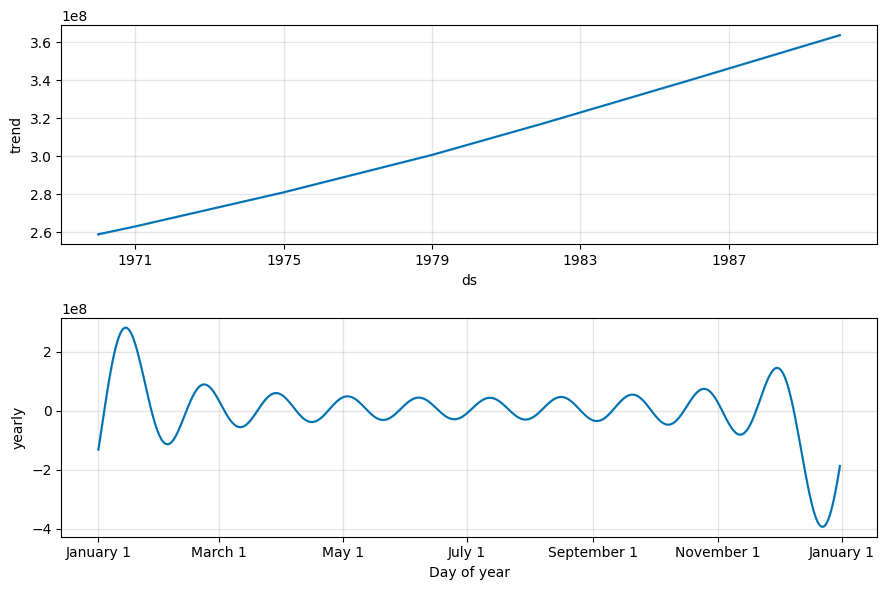

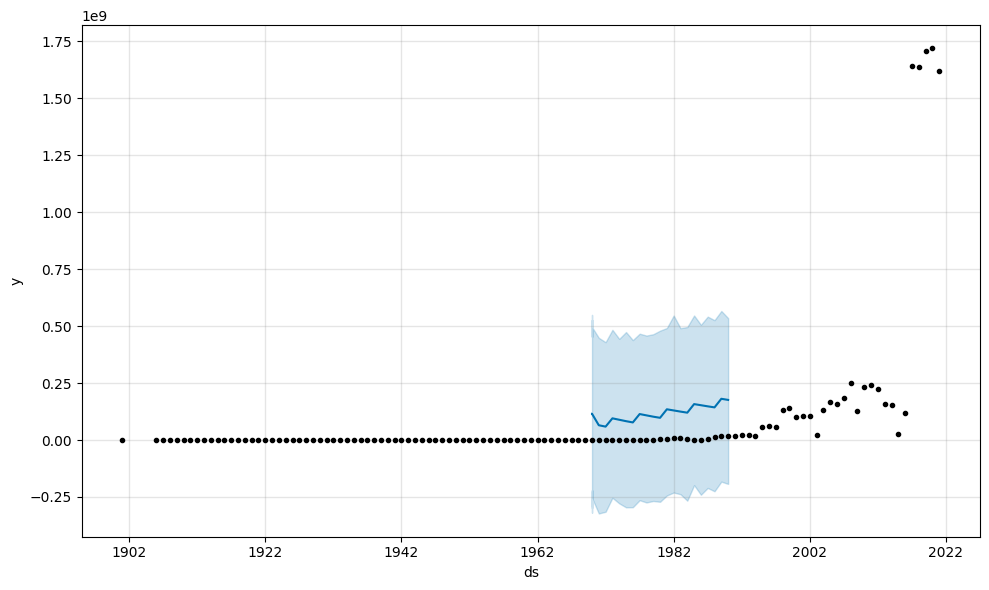

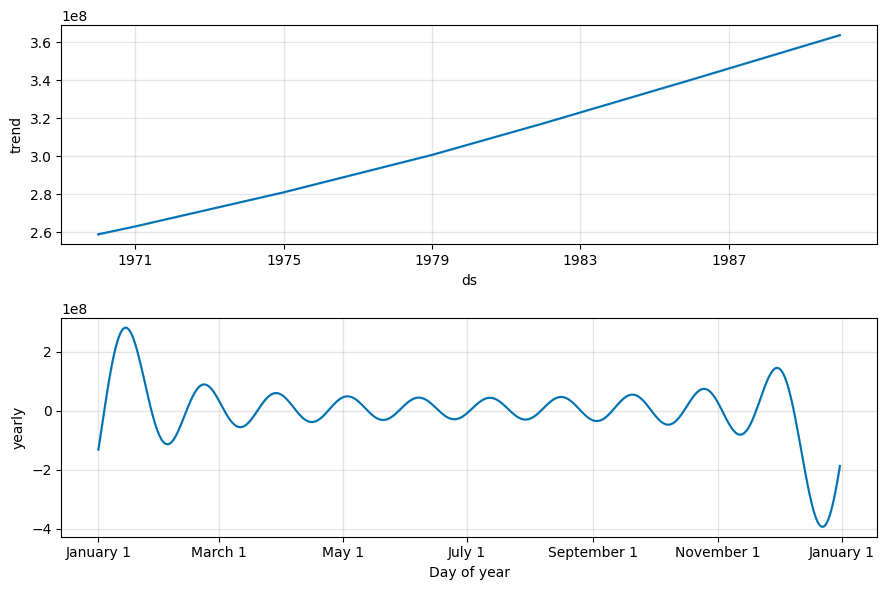

In [125]:
# Renombrar las columnas a 'ds' (fecha) y 'y' (valor)
data = df.loc[df.Region=='Caribbean', ['Year','ttl_adj_usd_damages']]
data = data.rename(columns={'Year': 'ds', 'ttl_adj_usd_damages': 'y'})
data = data.reset_index()
data['y'] = data.y.rolling(window=3).mean()
data = data.iloc[5:,]
# Crear una instancia del modelo Prophet
modelo = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Ajustar el modelo a los datos
modelo.fit(data)

# Generar fechas futuras para la predicción
futuro = modelo.make_future_dataframe(periods=20, freq='Y')  # Predicción para un año (365 días)

# Realizar la predicción
prediccion = modelo.predict(futuro)

# Visualizar la predicción
modelo.plot(prediccion)
modelo.plot_components(prediccion)

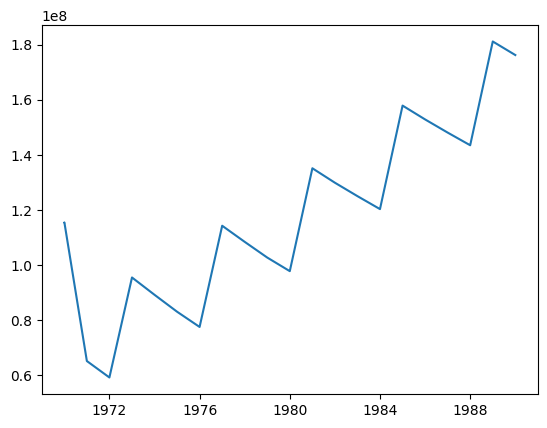

In [127]:
region = 'Caribbean'
var = 'No Injured'
#tmp = final.loc[(final.region==region)&(final.variable==var)]
plt.plot(prediccion['ds'],prediccion['yhat'])

In [76]:
#data = data.rename(columns={'Year': 'df', 'valor': 'ttl_adj_usd_damages'})
prediccion

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1900-01-01,3.198608e+09,-7.618764e+08,1.181691e+09,3.198608e+09,3.198608e+09,-3.026240e+09,-3.026240e+09,-3.026240e+09,-3.026240e+09,-3.026240e+09,-3.026240e+09,0.0,0.0,0.0,1.723680e+08
1,1902-01-01,3.208407e+09,-1.194882e+09,8.419441e+08,3.208407e+09,3.208407e+09,-3.403722e+09,-3.403722e+09,-3.403722e+09,-3.403722e+09,-3.403722e+09,-3.403722e+09,0.0,0.0,0.0,-1.953144e+08
2,1903-01-01,3.213307e+09,-1.235881e+09,7.196152e+08,3.213307e+09,3.213307e+09,-3.489451e+09,-3.489451e+09,-3.489451e+09,-3.489451e+09,-3.489451e+09,-3.489451e+09,0.0,0.0,0.0,-2.761442e+08
3,1907-01-01,3.232918e+09,-1.317443e+09,6.385638e+08,3.232918e+09,3.232918e+09,-3.489451e+09,-3.489451e+09,-3.489451e+09,-3.489451e+09,-3.489451e+09,-3.489451e+09,0.0,0.0,0.0,-2.565329e+08
4,1909-01-01,3.242730e+09,-1.005812e+09,1.029177e+09,3.242730e+09,3.242730e+09,-3.249243e+09,-3.249243e+09,-3.249243e+09,-3.249243e+09,-3.249243e+09,-3.249243e+09,0.0,0.0,0.0,-6.513209e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2036-12-31,3.870465e+09,-5.613997e+08,1.467604e+09,3.870462e+09,3.870469e+09,-3.454367e+09,-3.454367e+09,-3.454367e+09,-3.454367e+09,-3.454367e+09,-3.454367e+09,0.0,0.0,0.0,4.160985e+08
110,2037-12-31,3.875368e+09,-3.916258e+08,1.538574e+09,3.875364e+09,3.875372e+09,-3.333705e+09,-3.333705e+09,-3.333705e+09,-3.333705e+09,-3.333705e+09,-3.333705e+09,0.0,0.0,0.0,5.416623e+08
111,2038-12-31,3.880270e+09,-1.897818e+08,1.693783e+09,3.880266e+09,3.880275e+09,-3.144600e+09,-3.144600e+09,-3.144600e+09,-3.144600e+09,-3.144600e+09,-3.144600e+09,0.0,0.0,0.0,7.356706e+08
112,2039-12-31,3.885173e+09,-1.624768e+07,1.947300e+09,3.885168e+09,3.885178e+09,-2.887425e+09,-2.887425e+09,-2.887425e+09,-2.887425e+09,-2.887425e+09,-2.887425e+09,0.0,0.0,0.0,9.977478e+08


In [77]:
def predict_variable(df, vars, periods):
    results = {}
    idx = 0
    for var in vars:
        final = {}
        for region in df.Region.unique():
            data = df.loc[df.Region==region, ['Year',var]]
            data = data.rename(columns={'Year': 'ds', var: 'y'})
            modelo = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
            modelo.fit(data)
            futuro = modelo.make_future_dataframe(periods=periods, freq='Y')
            prediccion = modelo.predict(futuro)
            prediccion['variable'] = var
            prediccion['region'] = region
            results[idx] = prediccion
            idx = idx + 1
    return results

In [78]:
vars = ['No Injured','No Affected','No Homeless','Total Deaths','CPI', 'ins_adj_usd_damages','ttl_adj_usd_damages']
results = predict_variable(df, vars, 30)

14:51:48 - cmdstanpy - INFO - Chain [1] start processing
14:51:49 - cmdstanpy - INFO - Chain [1] done processing
14:51:49 - cmdstanpy - INFO - Chain [1] start processing
14:51:49 - cmdstanpy - INFO - Chain [1] done processing
14:51:49 - cmdstanpy - INFO - Chain [1] start processing
14:51:49 - cmdstanpy - INFO - Chain [1] done processing
14:51:50 - cmdstanpy - INFO - Chain [1] start processing
14:51:50 - cmdstanpy - INFO - Chain [1] done processing
14:51:50 - cmdstanpy - INFO - Chain [1] start processing
14:51:50 - cmdstanpy - INFO - Chain [1] done processing
14:51:50 - cmdstanpy - INFO - Chain [1] start processing
14:51:51 - cmdstanpy - INFO - Chain [1] done processing
14:51:51 - cmdstanpy - INFO - Chain [1] start processing
14:51:51 - cmdstanpy - INFO - Chain [1] done processing
14:51:51 - cmdstanpy - INFO - Chain [1] start processing
14:51:52 - cmdstanpy - INFO - Chain [1] done processing
14:51:52 - cmdstanpy - INFO - Chain [1] start processing
14:51:52 - cmdstanpy - INFO - Chain [1]

In [83]:
final.region.unique()

array(['Caribbean', 'Eastern Asia', 'Northern America', 'Southern Asia',
       'Western Africa', 'Western Asia', 'Eastern Africa',
       'Central America', 'South-Eastern Asia', 'Southern Europe',
       'South America', 'Western Europe', 'Eastern Europe',
       'Northern Africa', 'Middle Africa', 'Central Asia', 'Polynesia',
       'Australia and New Zealand', 'Melanesia', 'Northern Europe',
       'Southern Africa', 'Micronesia'], dtype=object)

In [159]:

final = pd.concat(results).reset_index()
final['pred_value'] = final['yhat']
final = final[['region','variable','ds','yhat_upper','yhat','pred_value']]

#Sanity Checks
final['pred_value'] = final.groupby(['region','variable']).yhat.rolling(window=5).mean().values
final['pred_value'] = np.where(final['pred_value']<0, 0, final['pred_value'])
final['ls_value'] = final.groupby(['region','variable']).yhat_upper.rolling(window=5).mean().values
final['ls_value'] = np.where(final['ls_value']<0, 0, final['ls_value'])

final.loc[final.pred_value.isna()==1,'pred_value'] = 0
final = final.loc[final.ds > pd.to_datetime("2021-01-01"),:]
final.head()

,region,variable,ds,yhat_upper,yhat,pred_value,ls_value
94,Caribbean,No Injured,2021-12-31,59400.717299,-18110.781116,0.000000,NaN
95,Caribbean,No Injured,2022-12-31,36883.420493,-40753.510169,88231.415516,1.502658e+06
96,Caribbean,No Injured,2023-12-31,4477.543803,-68328.181631,137718.816933,1.530930e+06
97,Caribbean,No Injured,2024-12-31,73303.151632,501.230820,151194.613531,1.538770e+06
98,Caribbean,No Injured,2025-12-31,55565.772468,-17169.962011,164670.410127,1.577900e+06


In [85]:
final.variable.unique()

array(['No Injured', 'No Affected', 'No Homeless', 'Total Deaths', 'CPI',
       'ins_adj_usd_damages', 'ttl_adj_usd_damages'], dtype=object)

In [141]:
final.loc[(final.variable=='ins_adj_usd_damages'),:]

,region,variable,ds,yhat_upper,yhat,pred_value
11614,Caribbean,ins_adj_usd_damages,2021-12-31,5.401502e+08,1.377210e+08,1.377210e+08
11615,Caribbean,ins_adj_usd_damages,2022-12-31,5.931919e+08,2.089722e+08,2.089722e+08
11616,Caribbean,ins_adj_usd_damages,2023-12-31,6.699959e+08,3.068923e+08,3.068923e+08
11617,Caribbean,ins_adj_usd_damages,2024-12-31,4.957868e+08,9.962756e+07,9.962756e+07
11618,Caribbean,ins_adj_usd_damages,2025-12-31,5.367576e+08,1.440678e+08,1.440678e+08
...,...,...,...,...,...,...
13819,Micronesia,ins_adj_usd_damages,2046-12-31,5.654114e+04,-5.822237e+05,2.827057e+04
13820,Micronesia,ins_adj_usd_damages,2047-12-31,1.285085e+04,-6.663257e+05,6.425426e+03
13821,Micronesia,ins_adj_usd_damages,2048-12-31,3.158350e+05,-3.818844e+05,1.579175e+05
13822,Micronesia,ins_adj_usd_damages,2049-12-31,2.221789e+05,-4.968574e+05,1.110895e+05


In [162]:
final.to_csv('predictions_v0.csv', index=False)

In [158]:
final

,region,variable,ds,yhat_upper,yhat,pred_value
94,Caribbean,No Injured,2021-12-31,5.940072e+04,-1.811078e+04,0.000000e+00
95,Caribbean,No Injured,2022-12-31,3.688342e+04,-4.075351e+04,8.823142e+04
96,Caribbean,No Injured,2023-12-31,4.477544e+03,-6.832818e+04,1.377188e+05
97,Caribbean,No Injured,2024-12-31,7.330315e+04,5.012308e+02,1.511946e+05
98,Caribbean,No Injured,2025-12-31,5.556577e+04,-1.716996e+04,1.646704e+05
...,...,...,...,...,...,...
16123,Micronesia,ttl_adj_usd_damages,2046-12-31,2.972672e+06,-2.429638e+06,1.849630e+08
16124,Micronesia,ttl_adj_usd_damages,2047-12-31,2.397641e+06,-2.771624e+06,1.740843e+08
16125,Micronesia,ttl_adj_usd_damages,2048-12-31,3.652569e+06,-1.808185e+06,2.173175e+08
16126,Micronesia,ttl_adj_usd_damages,2049-12-31,3.039103e+06,-2.260481e+06,2.099379e+08


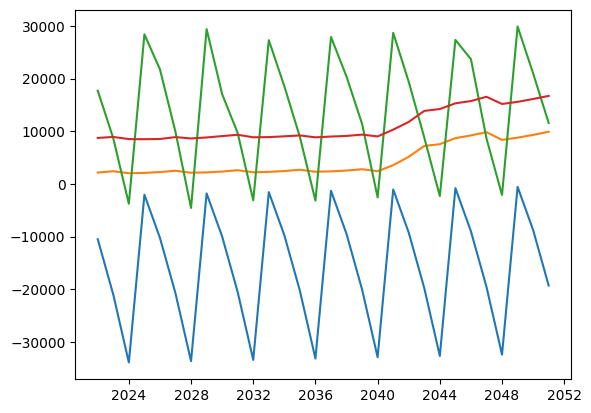

In [161]:
region = 'Caribbean'
var = 'Total Deaths'
tmp = final.loc[(final.region==region)&(final.variable==var)]
plt.plot(tmp['ds'],tmp['yhat'])
plt.plot(tmp['ds'],tmp['pred_value'])
plt.plot(tmp['ds'],tmp['yhat_upper'])
plt.plot(tmp['ds'],tmp['ls_value'])